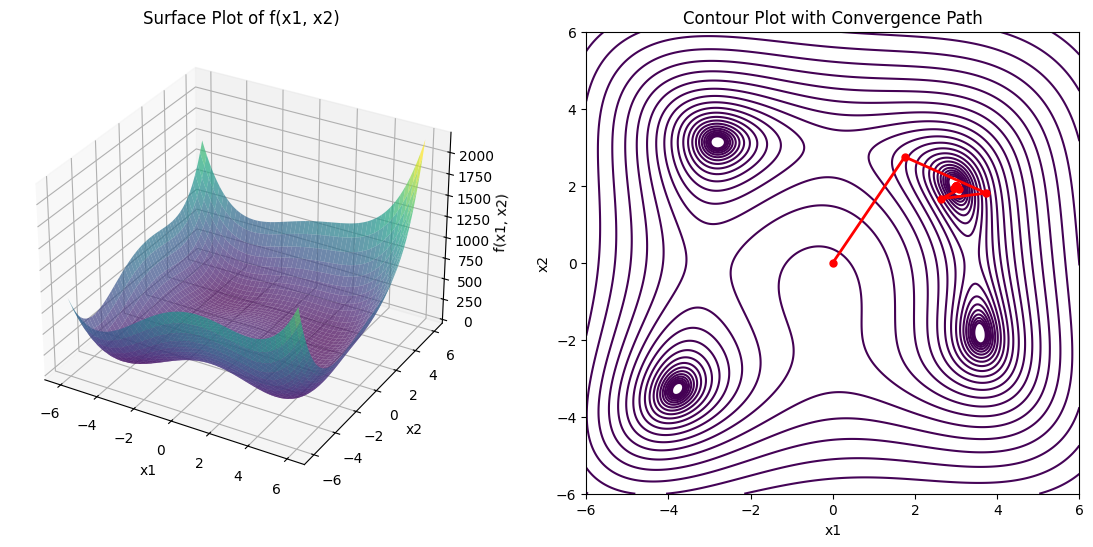

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Function to minimize
def f(x):
    return (x[0]**2 + x[1] - 11)**2 + (x[1]**2 + x[0] - 7)**2

# Gradient of the function
def grad_f(x):
    df_dx1 = 4*x[0]*(x[0]**2 + x[1] - 11) + 2*(x[1]**2 + x[0] - 7)
    df_dx2 = 2*(x[0]**2 + x[1] - 11) + 4*x[1]*(x[1]**2 + x[0] - 7)
    return np.array([df_dx1, df_dx2])

# Line search function to find the optimal step size
def line_search(x, direction):
    alpha = 1.0
    beta = 0.5
    sigma = 1e-4
    while f(x + alpha * direction) > f(x) + sigma * alpha * np.dot(grad_f(x), direction):
        alpha *= beta
    return alpha

# Steepest descent method
def steepest_descent(x0, tol=1e-3):
    x = x0
    path = [x]
    while np.linalg.norm(grad_f(x)) > tol:
        direction = -grad_f(x)
        alpha = line_search(x, direction)
        x = x + alpha * direction
        path.append(x)
    return np.array(path)

# Initial point
x0 = np.array([0.0, 0.0])
path = steepest_descent(x0)

# Plotting the surface and contour plots with the convergence path
x1_vals = np.linspace(-6, 6, 400)
x2_vals = np.linspace(-6, 6, 400)
X1, X2 = np.meshgrid(x1_vals, x2_vals)
Z = f([X1, X2])

fig = plt.figure(figsize=(14, 6))

# Surface plot
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.plot_surface(X1, X2, Z, cmap='viridis', alpha=0.7)
ax1.set_xlabel('x1')
ax1.set_ylabel('x2')
ax1.set_zlabel('f(x1, x2)')
ax1.set_title('Surface Plot of f(x1, x2)')

# Contour plot
ax2 = fig.add_subplot(1, 2, 2)
ax2.contour(X1, X2, Z, levels=np.logspace(0, 5, 35), cmap='viridis')
path = np.array(path)
ax2.plot(path[:, 0], path[:, 1], 'ro-', linewidth=2, markersize=5)
ax2.set_xlabel('x1')
ax2.set_ylabel('x2')
ax2.set_title('Contour Plot with Convergence Path')

plt.show()
